# 텍스트 빈도 분석 -3 넷플릭스

## 0)필요한 모듈 설치

In [ ]:
!pip install wordcloud

In [ ]:
!pip install xlrd

In [ ]:
import nltk
nltk.download()

## 1) 필요한 모듈 import

In [8]:
import pandas as pd
import glob
import re
from functools import reduce
from collections import Counter

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

## 2) 데이터 load

In [131]:
netflix = pd.read_csv('0923_netflix_titles.csv', header=0)
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


## 3) 데이터 전처리

In [133]:
all_title = netflix['title']
all_title

0                                            3%
1                                          7:19
2                                         23:59
3                                             9
4                                            21
                         ...                   
7782                                       Zozo
7783                                     Zubaan
7784                          Zulu Man in Japan
7785                      Zumbo's Just Desserts
7786    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
Name: title, Length: 7787, dtype: object

In [135]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

AttributeError: 'set' object has no attribute 'words'

In [137]:
words = []
for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+"," ",str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)
print(words)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['oct'], ['feb'], ['jul'], ['aug'], [], ['kuch', 'bheege', 'alfaaz'], ['goli', 'soda'], ['maj', 'rati', 'keteki'], ['mayurakshi'], ['saint', 'seiya', 'knight', 'zodiac'], ['error'], ['un', 'well'], ['alive'], ['annefrank', 'parallel', 'story'], ['blackaf'], ['cat', 'mewvie'], ['friendbutmarried'], ['friendbutmarried'], ['realityhigh'], ['roxy'], ['rucker'], ['selfie'], ['selfie'], [], ['ay', 'mi', 'madre'], ['arsi', 'pazar'], ['g', 'man', 'ig'], ['ok', 'filim', 'hareketler', 'bunlar'], ['l', 'r'], ['flux'], ['ubat'], ['chance', 'dance'], ['mile'], ['day', 'sun', 'city'], ['jours', 'en'], ['b', 'c'], ['day', 'prince'], ['day', 'solitude'], ['human'], ['meter'], ['thing', 'high', 'school'], ['year', 'one', 'woman', 'fight', 'justice'], ['halal'], ['hotter'], ['rupee', 'note'], ['round', 'gun'], ['year', 'promise'], ['camera'], ['reason'], ['reason', 'beyond', 'reason'], ['sin'], ['th'], ['th', 'conversation', 'oprah', 'winfrey'

In [139]:
# 2차원 리스트를 1차원 리스트로 변경
words2 = list(reduce(lambda x, y : x + y, words))
print(words2)

['oct', 'feb', 'jul', 'aug', 'kuch', 'bheege', 'alfaaz', 'goli', 'soda', 'maj', 'rati', 'keteki', 'mayurakshi', 'saint', 'seiya', 'knight', 'zodiac', 'error', 'un', 'well', 'alive', 'annefrank', 'parallel', 'story', 'blackaf', 'cat', 'mewvie', 'friendbutmarried', 'friendbutmarried', 'realityhigh', 'roxy', 'rucker', 'selfie', 'selfie', 'ay', 'mi', 'madre', 'arsi', 'pazar', 'g', 'man', 'ig', 'ok', 'filim', 'hareketler', 'bunlar', 'l', 'r', 'flux', 'ubat', 'chance', 'dance', 'mile', 'day', 'sun', 'city', 'jours', 'en', 'b', 'c', 'day', 'prince', 'day', 'solitude', 'human', 'meter', 'thing', 'high', 'school', 'year', 'one', 'woman', 'fight', 'justice', 'halal', 'hotter', 'rupee', 'note', 'round', 'gun', 'year', 'promise', 'camera', 'reason', 'reason', 'beyond', 'reason', 'sin', 'th', 'th', 'conversation', 'oprah', 'winfrey', 'ava', 'duvernay', 'blade', 'camera', 'minute', 'earth', 'block', 'present', 'last', 'men', 'philippine', 'br', 'st', 'summoning', 'alone', 'paris', 'state', 'foot', '

## 4) 데이터 탐색

In [141]:
count = Counter(words2)
count

Counter({'love': 152,
         'story': 95,
         'man': 79,
         'christmas': 79,
         'life': 75,
         'girl': 74,
         'world': 73,
         'movie': 63,
         'day': 61,
         'one': 58,
         'little': 58,
         'time': 58,
         'boy': 55,
         'monster': 53,
         'last': 49,
         'de': 49,
         'la': 48,
         'secret': 46,
         'power': 46,
         'high': 45,
         'live': 45,
         'el': 45,
         'american': 45,
         'black': 43,
         'house': 42,
         'game': 42,
         'war': 41,
         'king': 40,
         'city': 39,
         'night': 39,
         'super': 38,
         'tale': 37,
         'kid': 35,
         'new': 35,
         'legend': 35,
         'first': 34,
         'adventure': 34,
         'u': 34,
         'family': 33,
         'go': 33,
         'good': 33,
         'show': 33,
         'ranger': 33,
         'dream': 31,
         'special': 30,
         'great': 30,
         '

In [153]:
word_count = dict()
for tag, counts in count.most_common(400):    # 상위 400개의 데이터만 사용
    if (len(str(tag)) > 1):
        word_count[tag] = counts
        print("%s : %d" %(tag, counts))

love : 152
story : 95
man : 79
christmas : 79
life : 75
girl : 74
world : 73
movie : 63
day : 61
one : 58
little : 58
time : 58
boy : 55
monster : 53
last : 49
de : 49
la : 48
secret : 46
power : 46
high : 45
live : 45
el : 45
american : 45
black : 43
house : 42
game : 42
war : 41
king : 40
city : 39
night : 39
super : 38
tale : 37
kid : 35
new : 35
legend : 35
first : 34
adventure : 34
family : 33
go : 33
good : 33
show : 33
ranger : 33
dream : 31
special : 30
great : 30
friend : 30
mr : 29
baby : 28
star : 28
school : 27
year : 27
club : 27
dark : 27
killer : 27
kill : 26
big : 26
bad : 25
ghost : 25
two : 25
hai : 24
dragon : 24
woman : 23
happy : 23
true : 23
hero : 23
death : 23
america : 22
heart : 22
next : 22
back : 22
wild : 22
home : 21
island : 21
murder : 21
fire : 21
miss : 21
version : 21
prince : 20
park : 20
space : 20
white : 20
lost : 20
nova : 20
holiday : 19
crime : 19
planet : 19
devil : 19
history : 19
master : 19
blood : 19
magic : 19
bill : 19
free : 19
earth : 

## 5) 결과 시각화

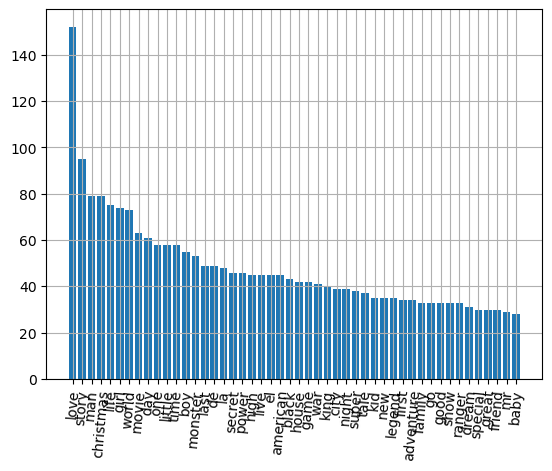

In [145]:
#막대그래프로 출력하기
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 85)
plt.grid(True)
plt.show()

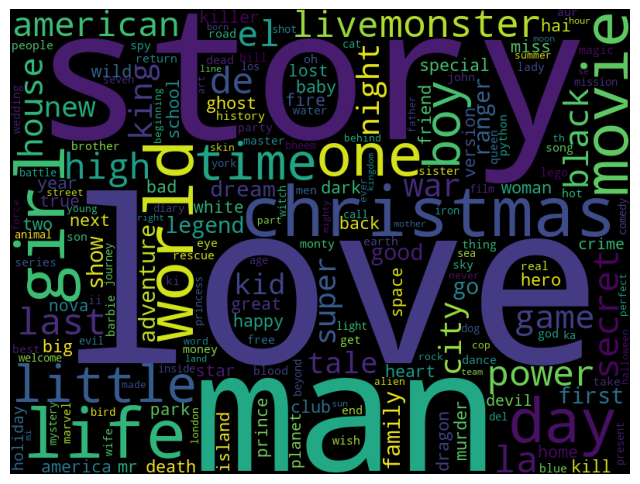

In [155]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'black', stopwords = stopwords, width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

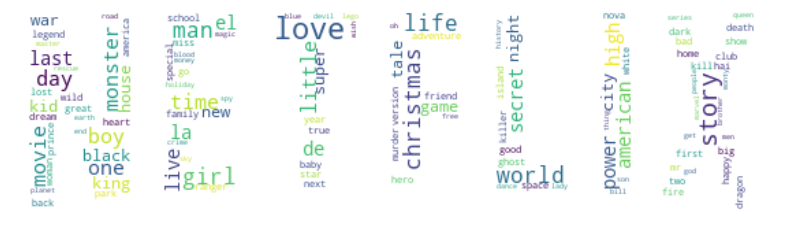

In [157]:
# https://lovit.github.io/nlp/2018/04/17/word_cloud/
from PIL import Image
import numpy as np

mask = np.array(Image.open("NETFLIX 넷플릭스 로고2.png"))

wordcloud = WordCloud(
    background_color="white",
    mask = mask,
)

wordcloud = wordcloud.generate_from_frequencies(word_count)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 1) 넷플릭스 전체 description

In [159]:
all_description = netflix['description']
words = []
for description in all_description:
    EnWords = re.sub(r"[^a-zA-Z]+"," ",str(description))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)


# 2차원 리스트를 1차원 리스트로 변경
words2 = list(reduce(lambda x, y : x + y, words))
# print(words2)

count = Counter(words2)

#딕셔너리 형태로 변환
word_count = dict()
for tag, counts in count.most_common(400):    # 상위 400개의 데이터만 사용
    if (len(str(tag)) > 1):
        word_count[tag] = counts
        print("%s : %d" %(tag, counts))

life : 1008
young : 655
family : 620
new : 613
woman : 592
find : 578
friend : 548
world : 521
love : 496
man : 490
two : 443
take : 439
year : 430
series : 358
one : 346
get : 339
must : 332
documentary : 329
school : 312
help : 300
story : 296
father : 294
home : 282
old : 279
high : 274
three : 263
girl : 257
secret : 239
group : 235
teen : 235
team : 233
set : 230
student : 226
try : 219
go : 217
make : 210
murder : 206
son : 205
time : 205
star : 204
daughter : 202
special : 201
city : 200
fall : 199
mother : 198
show : 198
death : 197
boy : 197
save : 197
turn : 197
brother : 196
crime : 196
town : 194
way : 189
back : 189
four : 189
day : 187
wife : 183
true : 183
war : 182
meet : 180
past : 179
face : 174
return : 174
becomes : 173
comedy : 171
fight : 171
stand : 169
adventure : 167
child : 166
come : 165
best : 163
power : 162
begin : 161
film : 158
mysterious : 156
battle : 155
force : 155
relationship : 154
work : 154
dream : 152
couple : 151
cop : 150
behind : 148
struggle

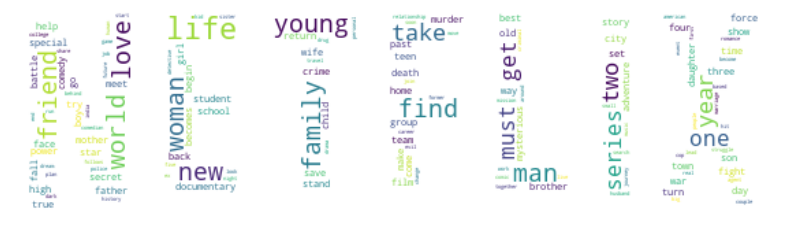

In [161]:
# https://lovit.github.io/nlp/2018/04/17/word_cloud/
from PIL import Image
import numpy as np

mask = np.array(Image.open("NETFLIX 넷플릭스 로고2.png"))

wordcloud = WordCloud(
    background_color="white",
    mask = mask,
)

wordcloud = wordcloud.generate_from_frequencies(word_count)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 2) TV Show의 Descriptions

In [163]:
tv_show_descriptions = netflix[netflix['type'] == 'TV Show']['description']
words = []
for description in tv_show_descriptions:
    EnWords = re.sub(r"[^a-zA-Z]+"," ",str(description))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)


# 2차원 리스트를 1차원 리스트로 변경
words2 = list(reduce(lambda x, y : x + y, words))
# print(words2)

count = Counter(words2)

#딕셔너리 형태로 변환
word_count = dict()
for tag, counts in count.most_common(400):    # 상위 400개의 데이터만 사용
    if (len(str(tag)) > 1):
        word_count[tag] = counts
        print("%s : %d" %(tag, counts))

life : 341
series : 285
world : 250
family : 212
new : 203
friend : 193
love : 167
young : 162
woman : 158
find : 152
year : 139
two : 134
school : 129
high : 112
take : 111
story : 105
adventure : 105
one : 100
help : 98
crime : 91
get : 89
group : 89
team : 88
secret : 87
three : 86
show : 85
power : 85
student : 82
home : 81
must : 81
man : 78
four : 78
murder : 77
time : 74
old : 71
city : 71
teen : 70
fight : 70
true : 70
girl : 68
mysterious : 67
make : 66
best : 64
set : 62
go : 62
day : 61
back : 61
star : 61
way : 60
death : 60
force : 60
join : 59
past : 58
romance : 57
father : 57
come : 57
evil : 57
battle : 57
town : 57
work : 56
detective : 55
comedy : 55
drama : 55
five : 55
war : 55
fun : 55
try : 55
meet : 54
become : 54
follows : 54
documentary : 53
based : 53
lead : 53
human : 52
history : 51
drug : 51
face : 50
dream : 50
personal : 50
police : 50
kid : 50
save : 50
dark : 49
journey : 49
around : 49
people : 49
boy : 49
reality : 49
behind : 48
daughter : 46
learn 

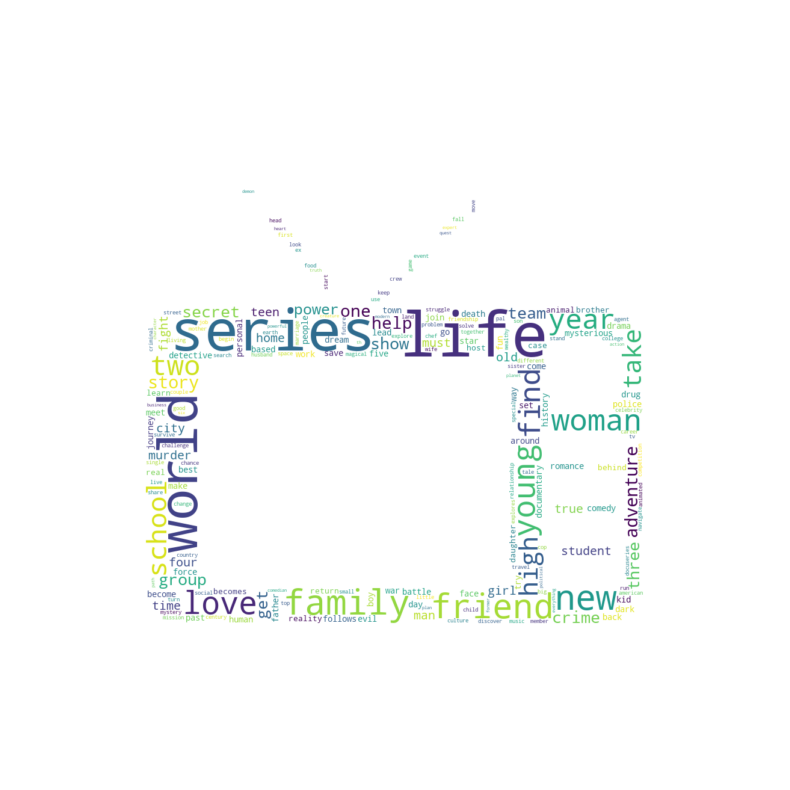

In [165]:
# https://lovit.github.io/nlp/2018/04/17/word_cloud/
from PIL import Image
import numpy as np

mask = np.array(Image.open("city-7071734_1280.png"))

wordcloud = WordCloud(
    background_color="white",
    mask = mask,
)

wordcloud = wordcloud.generate_from_frequencies(word_count)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 3) TV Show의 Descriptions

In [167]:
movie_descriptions = netflix[netflix['type'] == 'Movie']['description']
words = []
for description in movie_descriptions:
    EnWords = re.sub(r"[^a-zA-Z]+"," ",str(description))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)


# 2차원 리스트를 1차원 리스트로 변경
words2 = list(reduce(lambda x, y : x + y, words))
# print(words2)

count = Counter(words2)

#딕셔너리 형태로 변환
word_count = dict()
for tag, counts in count.most_common(400):    # 상위 400개의 데이터만 사용
    if (len(str(tag)) > 1):
        word_count[tag] = counts
        print("%s : %d" %(tag, counts))

life : 667
young : 493
woman : 434
find : 426
man : 412
new : 410
family : 408
friend : 355
love : 329
take : 328
two : 309
year : 291
documentary : 276
world : 271
must : 251
get : 250
one : 246
father : 237
old : 208
help : 202
home : 201
story : 191
girl : 189
school : 183
three : 177
son : 169
set : 168
teen : 165
try : 164
high : 162
fall : 159
special : 159
mother : 157
daughter : 156
turn : 156
go : 155
secret : 152
brother : 151
wife : 148
boy : 148
save : 147
group : 146
team : 145
student : 144
make : 144
star : 143
stand : 140
death : 137
town : 137
film : 132
time : 131
city : 129
murder : 129
return : 129
way : 129
back : 128
child : 127
war : 127
becomes : 127
day : 126
meet : 126
begin : 126
face : 124
couple : 123
past : 121
comedy : 116
relationship : 115
comedian : 114
true : 113
show : 113
four : 111
plan : 109
come : 108
cop : 108
soon : 107
first : 106
former : 105
crime : 105
dream : 102
struggle : 101
fight : 101
behind : 100
career : 99
best : 99
battle : 98
wor

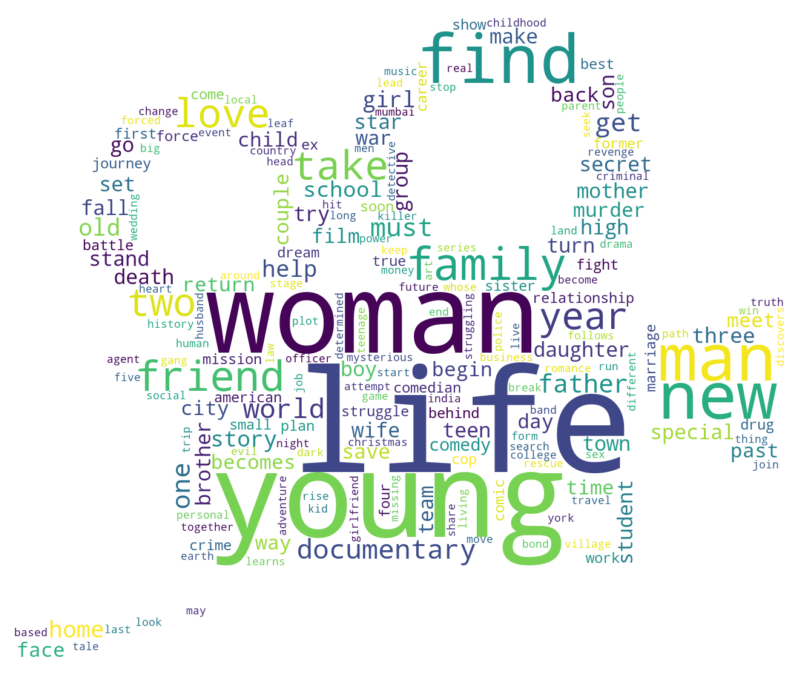

In [169]:
# https://lovit.github.io/nlp/2018/04/17/word_cloud/
from PIL import Image
import numpy as np

mask = np.array(Image.open("movie.jpg"))

wordcloud = WordCloud(
    width = 800,
    height = 800,
    background_color="white",
    mask = mask,
)

wordcloud = wordcloud.generate_from_frequencies(word_count)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 4) listed_in(장르)

In [174]:
listin = netflix['listed_in']
words = []
for genre in listin:
    EnWords = re.sub(r"[^a-zA-Z]+"," ",str(genre))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)


# 2차원 리스트를 1차원 리스트로 변경
words2 = list(reduce(lambda x, y : x + y, words))
# print(words2)

count = Counter(words2)

#딕셔너리 형태로 변환
word_count = dict()
for tag, counts in count.most_common(400):    # 상위 400개의 데이터만 사용
    if (len(str(tag)) > 1):
        word_count[tag] = counts
        print("%s : %d" %(tag, counts))

movie : 4989
tv : 4972
international : 3636
drama : 2810
show : 2612
comedy : 2377
action : 871
adventure : 871
romantic : 864
documentary : 786
independent : 673
thriller : 541
child : 532
family : 532
crime : 427
kid : 414
horror : 381
stand : 381
docuseries : 353
music : 321
musical : 321
sci : 294
fi : 294
fantasy : 294
british : 232
reality : 222
anime : 205
sport : 196
korean : 150
series : 148
spanish : 147
language : 147
classic : 130
mystery : 90
lgbtq : 90
cult : 86
science : 85
nature : 85
teen : 60
faith : 57
spirituality : 57
feature : 57
talk : 52


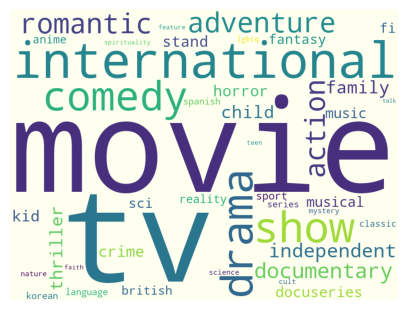

In [178]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (5,5))
plt.imshow(cloud)
plt.axis('off')
plt.show()

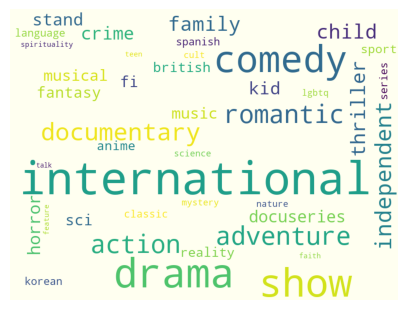

In [180]:
# 검색어로 사용된 '산업혁명' 삭제
del word_count['movie']
del word_count['tv']

stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (5,5))
plt.imshow(cloud)
plt.axis('off')
plt.show()